### Anomaly Detection
* What are Outliers ?
* Statistical Methods for Univariate Data
* Using Gaussian Mixture Models
* Fitting an elliptic envelope
* Isolation Forest
* Using clustering method like DBSCAN

### Applications in Industry
* Fraud Detection
* Fault Detection
* Intrusion Detection
* System health Monitoring
* Event Detection in Sensors

### 1. Outliers
* New data which doesn't belong to general trend (or distribution) of entire data are known as outliers.
* Data belonging to general trend are known as inliners.
* Learning models are impacted by presence of outliers.
* Anomaly detection is another use of outlier detection in which we find out unusual behaviour.
* Data which were detected outliers can be deleted from complete dataset.
* Outliers can also be marked before using them in learning methods

The outliers may suggest experimental errors, error in taking measurement, or anomaly. Age of a person wrongly recorded as 150 years instead of 15 years. Such an outlier need to be discarded.
However, outliers are not always bad. For example, it may point to an anomaly like credit card fraud or a rare disease.

### 2. Statistical Methods for Univariate Data
* Using Standard Deviation Method - zscore
* Using Interquartile Range Method - IRQ

##### Using Standard Deviation Method
* If univariate data follows Gaussian Distribution, we can use standard deviation to figure out where our data lies

In [39]:
import numpy as np
import pandas as pd

In [40]:
data = np.random.normal(size=1000)

<AxesSubplot:>

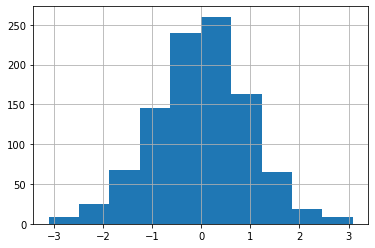

In [41]:
series = pd.Series(data) 
series.hist()

* Adding More Outliers

<AxesSubplot:>

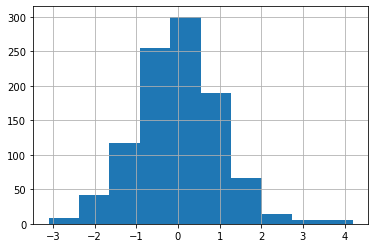

In [42]:
series[-5:] = [3.5,3.6,4,3.56,4.2]
series.hist()

In [43]:
from scipy.stats import zscore

* Detecting Outliers

In [44]:
data[np.abs(zscore(data)) > 3]

array([-3.1063728 ,  3.08955912,  3.5       ,  3.6       ,  4.        ,
        3.56      ,  4.2       ])

In [45]:
#print position
position = np.abs(zscore(data)) > 3
for i in range(0,len(data)):
    if position[i] == True:
        print(i)

197
321
995
996
997
998
999


##### Using Interquartile Range
* For univariate data not following Gaussian Distribution IQR is a way to detect outliers
* Divide a dataset into quartiles
* Data is sorted into ascending order and distributed into 4 equal parts
* Q1, Q2, Q3 called first, second and third quartiles. These values separates the 4 equal parts


<img src="iqr.JPG" width="300" />

* Minimum = minimum value in the dataset
* Maximum = maximum value in the dataset
* Range of dataset = Maximum - Minimum
* Given data is ordered: Median is Second Quartile(centre point)
* IQR = Diff between Q3 - Q1
* Lower Bound: (Q1 - 1.5 * IQR)
* Upper Bound: (Q3 + 1.5 * IQR)

In [46]:
from scipy.stats import iqr

In [47]:
data = np.random.normal(size=1000)

In [48]:
data[-5:]=[-2,9,11,-3,-21]

In [49]:
iqr_value = iqr(data)

In [50]:
lower_threshold = np.percentile(data,25) - iqr_value*1.5

In [51]:
upper_threshold = np.percentile(data,75) + iqr_value*1.5

In [52]:
upper_threshold

2.6891465023053813

In [53]:
lower_threshold

-2.6844012588521258

In [54]:
data[np.where(data < lower_threshold)]

array([ -2.81110756,  -3.        , -21.        ])

In [55]:
data[np.where(data > upper_threshold)]

array([ 3.16173871,  2.78073958,  9.        , 11.        ])

<AxesSubplot:>

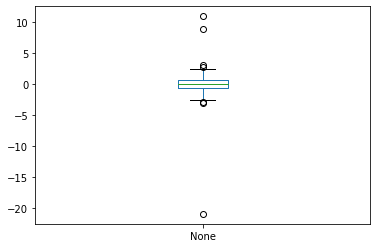

In [56]:
import pandas as pd
my_data = pd.Series(data)
my_data.plot(kind = 'box')

### 3. Using Gaussian Mixture Models
* Data might contain more than one peaks in the distribution of data.
* Trying to fit such multi-model data with unimodel won't give a good fit.
* GMM allows to fit such multi-model data.
* Configuration involves number of components in data, n_components.
* covariance_type controls the shape of cluster
  - full : cluster will be modeled to eclipse in arbitrary dir
  - sperical : cluster will be spherical like kmeans
  - diag : cluster will be aligned to axis
* We will see how GMM can be used to find outliers

<img src="GMM.JPG" width="600" />

Consider above case  
* data is generated from Gaussians from the elliptical shape of the 2D Gaussian  
* data is normally distributed as per CAP theorem  
* K-Means dont take into account covariance of data.E.g: X and Y move together. large X means large Y. If we have two points, one follow trend and other dont than K-Means still consider them equal as it uses Euclidean distance.   
* point which follow trend matches closer to Guassian than the point which doesnt  




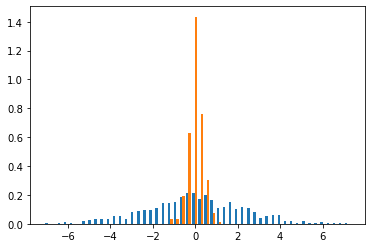

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
C2 = np.array([[1., -0.1], [2.7, .2]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),np.dot(np.random.randn(n_samples, 2), C2)]
X[-5:] = [[4,-1],[4.1,-1.1],[3.9,-1],[4.0,-1.2],[4.0,-1.3]]
pyplot.hist(X, bins=50, density=True)
pyplot.show()

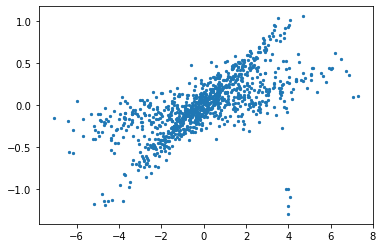

In [60]:
plt.scatter(X[:,0], X[:,1],s=5)

In [61]:
from sklearn.mixture import GaussianMixture

In [62]:
gmm = GaussianMixture(n_components=3)

In [63]:
gmm.fit(X)

GaussianMixture(n_components=3)

In [64]:
pred = gmm.predict(X)

In [65]:
pred[:50]

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

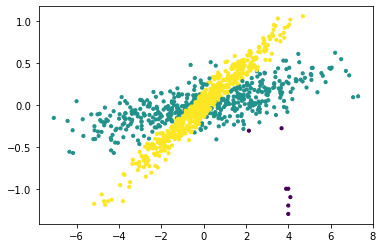

In [66]:
plt.scatter(X[:,0], X[:,1],s=10,c=pred)

### 4. Isolation Forest
* Useful in detecting outliers in **high dimension** datasets.
* Other techniques: construction of a profile of what is “normal”
* it explicitly isolates anomalous points in the dataset 
* exploiting sampling techniques to an extent that is not allowed to the profile-based method 
* very fast algorithm with a low memory demand


In [67]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [68]:
from sklearn.ensemble import IsolationForest

In [69]:
data = np.r_[X_train,X_test,X_outliers]

In [70]:
iso = IsolationForest( contamination='auto')

In [71]:
iso.fit(data)

IsolationForest()

In [72]:
pred = iso.predict(data)

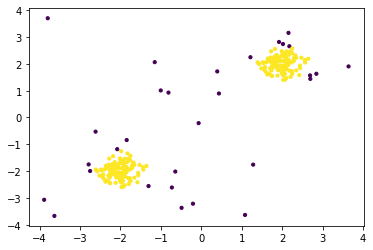

In [73]:
plt.scatter(data[:,0], data[:,1],s=10,c=pred)

### 5. Outlier Detection using DBSCAN
* DBSCAN is a clustering method based on density
* Groups data which are closer to each other.
* Doesn't use distance vector calculation method
* Data not close enough to any cluster is not assigned any cluster & these can be anomalies
* eps controls the degree of considering a data part of cluster

In [74]:
from sklearn.cluster import DBSCAN

In [75]:
dbscan = DBSCAN(eps=.3)

In [76]:
dbscan.fit(data)

DBSCAN(eps=0.3)

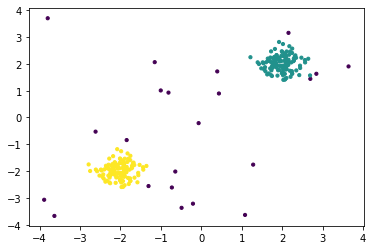

In [78]:
plt.scatter(data[:,0], data[:,1],s=10,c=dbscan.labels_)